In [2]:
#네이버 뉴스로 알아보는 저작권 문제

In [7]:
import urllib.request
import datetime
import json

desc_list=[]
def get_request_url(url):
    client_id = "ebU_O6PVpe7hodK5LVTM"
    client_secret = "5hdXOiyl6N"
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    try:
        response = urllib.request.urlopen(req) # url 요청
        if response.getcode() == 200:
            return response.read().decode('utf-8') # 읽어들인 문자열을 반환
    except Exception as e:
        print(e)
        print(f"Error for URL: {url}")
        
def get_naver_search(node, search_text, start, display):
    base = "https://openapi.naver.com/v1/search"
    node = f"/{node}.json" # node : 크롤링 대상
    query_string = f"{urllib.parse.quote(search_text)}"
    # f"?query={query_string}&start={start}&display={display}"
    parameters = ("?query={}&start={}&display={}". 
    format(query_string, start, display))
    url = base + node + parameters
    response = get_request_url(url) # 하나의 url완성
    if response is None:
        return None
    else:
        # json 문자열을 Python 객체로 변환
        return json.loads(response)
    
def main():
    node = 'news' # 크롤링 대상
    # search_text = input('검색어를 입력하세요: ')
    search_text = 'AI 노래 저작권'
    cnt = 0
    json_response = get_naver_search(node, search_text, 1, 100)
    if (json_response is not None) and (json_response['display'] != 0):
        for post in json_response['items']:
            cnt += 1
            # 1단계

            print(f"[{cnt}]", end=" ")
            print(post['title'])
            print(post['description'])
            desc_list.append(post['description'].replace("<b>","").replace("</b>",""))
            print(post['originallink'])
            print(post['link'])
            print(post['pubDate'])

if __name__ == '__main__':
    main()

[1] [<b>AI</b>봤!서현] 프레디 머큐리가 부르는 '사건의 지평선'? <b>AI</b> 커버, 문제 없을까
프레디 머큐리의 <b>AI</b> 커버는 고인이 된 전설적인 가수가 다소 어색하게 느껴지는 국내 <b>노래</b>를 부르는 만큼... 그러나 거의 모든 <b>AI</b> 제작물이 그러하듯 <b>AI</b> 커버 또한 <b>저작권</b>법 등 다양한 영역에서 문제를 안고 있다.... 
http://www.metroseoul.co.kr/article/20240214500592
http://www.metroseoul.co.kr/article/20240214500592
Wed, 14 Feb 2024 16:12:00 +0900
[2] [손병채의 센스메이킹]〈34〉<b>AI</b> 시대의 '몸': 화면 너머의 인간 신체를 보라
관련 <b>노래</b>를 추가할 수 없게 되었다. UMG는 이 같은 결정에 대해 해당 숏폼 동영상 플랫폼은 인공지능(<b>AI</b>)이... 장려함으로써 <b>AI</b>에 의한 아티스트 대체를 후원하는 것과 다름없다며 방대한 양의 <b>저작권</b> 침해 콘텐츠, 혐오... 
https://www.etnews.com/20240212000053
https://n.news.naver.com/mnews/article/030/0003180294?sid=110
Mon, 12 Feb 2024 16:02:00 +0900
[3] 유튜브 켜면 쏟아지는 ‘<b>AI</b> 가수들’…<b>저작권</b> 문제 없나요?
<b>AI</b> 프로그램을 이용, 콘텐츠를 만드는 이용자들도 <b>저작권</b> 침해로 처벌받을 수 있다. 현재 유튜브 등 SNS에는 기존 <b>노래</b>를 <b>AI</b> 목소리로 더빙해 올리는 영상이 유행이다. 이런 영상들을 플랫폼 업체들이 <b>저작권</b> 위반으로... 
https://www.mk.co.kr/article/10938438
https://n.news.naver.com/mnews/article/024/00000

In [8]:
desc_list

['프레디 머큐리의 AI 커버는 고인이 된 전설적인 가수가 다소 어색하게 느껴지는 국내 노래를 부르는 만큼... 그러나 거의 모든 AI 제작물이 그러하듯 AI 커버 또한 저작권법 등 다양한 영역에서 문제를 안고 있다.... ',
 '관련 노래를 추가할 수 없게 되었다. UMG는 이 같은 결정에 대해 해당 숏폼 동영상 플랫폼은 인공지능(AI)이... 장려함으로써 AI에 의한 아티스트 대체를 후원하는 것과 다름없다며 방대한 양의 저작권 침해 콘텐츠, 혐오... ',
 'AI 프로그램을 이용, 콘텐츠를 만드는 이용자들도 저작권 침해로 처벌받을 수 있다. 현재 유튜브 등 SNS에는 기존 노래를 AI 목소리로 더빙해 올리는 영상이 유행이다. 이런 영상들을 플랫폼 업체들이 저작권 위반으로... ',
 '이들은 우연한 행사에서 안면을 텄고, 2022년 6월 어느 날 식사하다가 “함께 노래를 불러보자”고... 연합뉴스 문화부 기자 buff27@yna.co.kr 2024. 1. 26&lt;저작권자(C) 연합뉴스 동북아센터 월간 마이더스, 무단 전재-재배포 금지&gt;',
 '생성형 인공지능(AI) 챗봇이 노래도 만들어준다. 마이크로소프트(Microsoft)의 빙(Bing) 챗이라 불렸던 대화형... 작년 12월 27일 문화체육관광부와 한국저작권위원회는 ‘생성형 AI 저작권 안내서’를 발간하며 AI 사업자... ',
 '‘이 사운드는 사용할 수 없습니다.’ ‘저작권 제한으로 인해 소리가 제거됐습니다.’ 틱톡에서 이런... 이와 관련해 유니버설뮤직은 지난해 10월 AI 기업 앤트로픽에 “노래 가사를 무단으로 AI 학습에 사용했다”며... ',
 "'가짜 노래'로 피해를 볼 수 있다는 우려다. 지난해 4월 유명 싱어송라이터 더 위켄드와 힙합 스타... 두 가수의 소속사인 유니버설뮤직은 당시 “우리 아티스트의 음악을 이용한 생성형 AI의 학습은 저작권법 위반... ",
 '‘가짜 노래’로 피해를 볼 수 있다는 우려다. 지난해 4월 유명 싱어송라이터 더 위켄드와 힙합 스타... 두 가

In [12]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image

def make_wordcloud(title_list, stopwords, word_count):
    okt = Okt()
    sentences_tag = []
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
    noun_adj_list = []
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    tag_dict = dict(tags)
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    path = r'c:\Windows\Fonts\malgun.ttf'
    img_mask = np.array(Image.open('illustrator.png'))
    wordcloud = WordCloud(font_path=path, width=800, height=600,
                      background_color="#330000", max_font_size=200,
                      repeat=True, colormap='plasma',
                      mask=img_mask, collocations=False, max_words=50)

    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

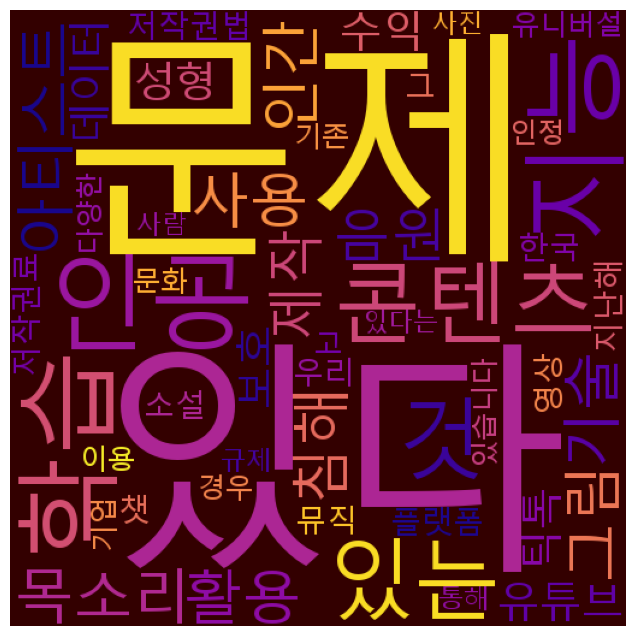

In [14]:
stopwords = ['AI','음악','노래','작곡','커버','곡','말','월드컵','로','이','가사','위','옥','사랑','작사','등','수','생','저작권','가수','좋아하는','입니다','이런','의','대해','지난','를','관련']
make_wordcloud(desc_list, stopwords, 100)

In [15]:
# 5. Non-Negative Matrix Factorization (NMF): 문서와 단어 간의 행렬을 분해하여 주제를 추출하는 방법 중 하나입니다.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
documents = desc_list
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)
num_topics = 4  # 주제의 수를 설정
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_matrix = nmf_model.fit_transform(tfidf_matrix)
feature_names = vectorizer.get_feature_names_out()
topic_words = []
topic_list=[]
for topic_idx, topic in enumerate(nmf_model.components_):
    top_word_indices = topic.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    topic_words.append(top_words)
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")
    topic_list.append(', '.join(top_words))
doc_topic_assignments = nmf_model.transform(tfidf_matrix)
print("\nDocument-Topic Assignments:")
arg_list=[]
for i, doc_topic in enumerate(doc_topic_assignments):
    print(f"Document #{i + 1}: Topic #{doc_topic.argmax() + 1}")
    arg_list.append(doc_topic.argmax() + 1)
counts = Counter(arg_list)

Topic #1: ai, 저작권, 노래를, 생성형, quot
Topic #2: 저작권을, 인정하지, 했습니다, 그림이나, 표현된
Topic #3: 사용료를, 수익을, 문제로, 묵음, 음향
Topic #4: 직무, 등이, 미술, 근육장애인의, 연극

Document-Topic Assignments:
Document #1: Topic #1
Document #2: Topic #1
Document #3: Topic #1
Document #4: Topic #1
Document #5: Topic #1
Document #6: Topic #1
Document #7: Topic #1
Document #8: Topic #1
Document #9: Topic #1
Document #10: Topic #1
Document #11: Topic #1
Document #12: Topic #3
Document #13: Topic #3
Document #14: Topic #1
Document #15: Topic #1
Document #16: Topic #3
Document #17: Topic #1
Document #18: Topic #1
Document #19: Topic #1
Document #20: Topic #1
Document #21: Topic #1
Document #22: Topic #1
Document #23: Topic #1
Document #24: Topic #1
Document #25: Topic #1
Document #26: Topic #4
Document #27: Topic #1
Document #28: Topic #4
Document #29: Topic #1
Document #30: Topic #1
Document #31: Topic #1
Document #32: Topic #1
Document #33: Topic #1
Document #34: Topic #1
Document #35: Topic #2
Document #36: Topic #1
Document #37: 

In [18]:
import pandas as pd
print(counts)
print(dict(counts))
df=pd.DataFrame([dict(counts)])
df=df[[1,2,3,4]]
df

Counter({1: 61, 4: 22, 3: 9, 2: 8})
{1: 61, 4: 22, 3: 9, 2: 8}


,1,2,3,4
0,61,8,9,22


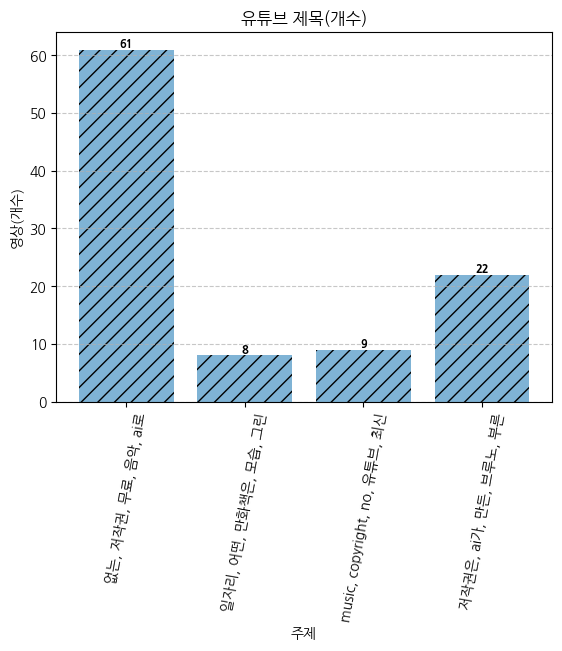

In [20]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 주어진 데이터
x = df.columns
y = df.loc[0]

# 그래프 그리기
plt.bar(x, y, color='#7FB3D5', hatch='//')  # 색상을 온화한 파란색으로 지정하고 hatch를 추가하여 실선 모양으로 만듦
plt.xlabel('주제')  # x축 레이블 변경
plt.ylabel('영상(개수)')  # y축 레이블 변경
plt.title('유튜브 제목(개수)')  # 그래프 제목 변경
plt.grid(axis='y', linestyle='--', alpha=0.7)  # y축에 그리드 적용
plt.xticks(range(1, 5), topic_list, rotation=80)

# 그래프에 수치 표시
for i, v in enumerate(y, start=1):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontweight='bold', fontsize=8)

plt.show()


In [16]:
from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화 
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산 
    for raw_sentence in raw_sentences:
        # NTLK 기반의 품사 태깅 문장 추출  
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word , tag in tagged_sentence:
            
            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue                   
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성. 
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산. 
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())           
            tokens_count += 1
    
    if not tokens_count:
        return 0
    
    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0 :
        return 1
    
    return 0

In [18]:
#pip install googletrans==4.0.0-rc1
from googletrans import Translator
import nltk
nltk.download('vader_lexicon')  # VADER Lexicon 다운로드
total_list=[]
def translate_list_elements(input_list, target_language='en'):
    translator = Translator()
    translation_result = []

    for element in input_list:
        translation = translator.translate(element, dest=target_language).text
        translation_result.append({element: translation})

    return translation_result

# 예시 리스트
#original_list = data_list[0:20]

# 번역 실행
for i in desc_list:
    translated_dict_list = translate_list_elements([i])
    total_list.append(translated_dict_list)
# # 결과 출력
# for translation_dict in translated_dict_list:
#     print(translation_dict)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mathn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
emotional_result=dict()
for i in total_list:
    if swn_polarity(list(i[0].values())[0]) :
        emotional_result.setdefault(list(i[0].items())[0][0], "1")
    else :
        emotional_result.setdefault(list(i[0].items())[0][0], "0")

In [20]:
import pandas as pd
df = pd.DataFrame(emotional_result.items(), columns=['title', 'result'])

In [21]:
result=df["result"].value_counts()

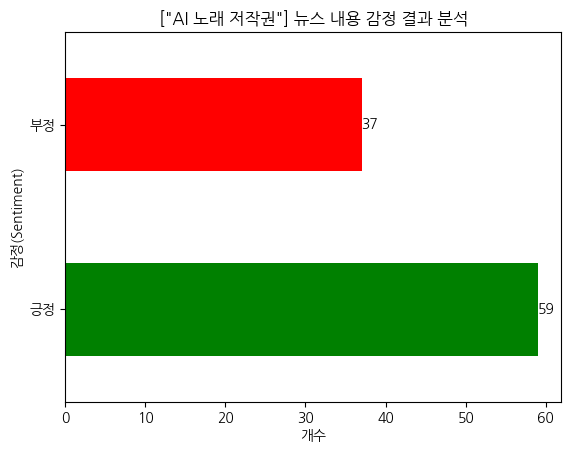

In [23]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
# 주어진 Series
result_series = result

# 그래프 그리기
colors = ['green', 'red']  # 긍정은 녹색, 부정은 빨강색
ax = result_series.plot(kind='barh', color=colors)

plt.xlabel('개수')
plt.ylabel('감정(Sentiment)')
plt.yticks(range(2),["긍정","부정"])
plt.title('["AI 노래 저작권"] 뉴스 내용 감정 결과 분석')

# 각 막대 위에 값 표시
for index, value in enumerate(result_series):
    plt.text(value, index, str(value), va='center')

plt.show()


In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html=urlopen(url_list[0])
bs=BeautifulSoup(html,"html.parser")
bs.find_all("div", class_="glarity--content") # 익스텐션 사용이 불가능하다


[]

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

driver = webdriver.Chrome()
driver.get(url_list[0])

In [ ]:
time.sleep(15)
html=driver.page_source
soup=BeautifulSoup(html,'html.parser')

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time

# 사용자 정보 설정
username = "mathnoah@naver.com"
password = "dddd"

chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

driver = webdriver.Chrome(options=chrome_options)
driver.get("https://www.youtube.com/")

# 로그인 버튼 찾기 및 클릭
login_button = driver.find_element(By.XPATH,'//*[@id="buttons"]/ytd-button-renderer/yt-button-shape/a')
login_button.click()

# 로그인 정보 입력
time.sleep(2)
username_input = driver.find_element(By.ID, "identifierId")
username_input.send_keys(username)
username_input.send_keys(Keys.RETURN)

time.sleep(2) # 비번 입력에서 막힘;;
password_input = driver.find_element(By.NAME, "Passwd")
password_input.send_keys(password)
password_input.send_keys(Keys.RETURN)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"[name="Passwd"]"}
  (Session info: chrome-headless-shell=121.0.6167.185)


In [ ]:
from urllib.request import urlopen
from urllib.request import Request
from bs4 import BeautifulSoup
melon_url = 'https://www.youtube.com/'
# HTTP request 패킷 생성: Request()
urlrequest = Request(melon_url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(urlrequest)
soup = BeautifulSoup(html.read().decode('utf-8'), 'html.parser')
print(soup)

<!DOCTYPE html>
<html darker-dark-theme="" darker-dark-theme-deprecate="" lang="ko-KR" style="font-size: 10px;font-family: Roboto, Arial, sans-serif;" system-icons="" typography="" typography-spacing=""><head><script data-id="_gd" nonce="GqcLGc6bsSS1xopIawr62w">window.WIZ_global_data = {"MuJWjd":false,"nQyAE":{},"oxN3nb":{"1":false}};</script><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="ApvK67ociHgr2egd6c2ZjrfPuRs8BHcvSggogIOPQNH7GJ3cVlyJ1NOq/COCdj0+zxskqHt9HgLLETc8qqD+vwsAAABteyJvcmlnaW4iOiJodHRwczovL3lvdXR1YmUuY29tOjQ0MyIsImZlYXR1cmUiOiJQcml2YWN5U2FuZGJveEFkc0FQSXMiLCJleHBpcnkiOjE2OTUxNjc5OTksImlzU3ViZG9tYWluIjp0cnVlfQ==" http-equiv="origin-trial"/><script nonce="GqcLGc6bsSS1xopIawr62w">var ytcfg={d:function(){return window.yt&&yt.config_||ytcfg.data_||(ytcfg.data_={})},get:function(k,o){return k in ytcfg.d()?ytcfg.d()[k]:o},set:function(){var a=arguments;if(a.length>1)ytcfg.d()[a[0]]=a[1];else{var k;for(k in a[0])ytcfg.d()[k]=a[0][k]}}};
window.ytcfg.set('EME